## 라이브러리 import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

## 인코딩, 디코딩을 하는 하나의 모델 생성

In [2]:
input_img = Input(shape=(784,))

encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## 만들어진 모델을 둘로 쪼갬

In [3]:
# 만들어진 모델을 사용해 encoder만 따로 생성
encoder = Model(input_img, encoded)
encoder.summary()  # 출력 32

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
encoded_input = Input(shape=(32,))  # encoding된 출력값의 크기만큼 input으로 받는 layer 새로 생성
decoder_layer = autoencoder.layers[-1]  # autoencoder 모델의 마지막 layer(784개 출력하는 디코딩 부분)
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoder.summary()  # 출력 784

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()  # input data와 output data가 같아지게 하기 때문에(input data가 곧 정답) y 데이터는 사용 안함

11493376/11490434 [==============================] - 0s 0us/step


## 데이터 전처리

In [7]:
# 데이터 스케일링
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# 데이터 1차원으로
flatted_x_train = x_train.reshape(-1, 28*28)
flatted_x_test = x_test.reshape(-1, 28*28)
print(flatted_x_train.shape)
print(flatted_x_test.shape)

(60000, 784)
(10000, 784)


## 모델 학습

In [8]:
fit_hist = autoencoder.fit(flatted_x_train, flatted_x_train,  # 입력과 정답이 같음
                           epochs=50, batch_size=256, shuffle=True,
                           validation_data=(flatted_x_test, flatted_x_test),
                           )

Epoch 1/50
235/235 [==============================] - 2s 3ms/step - loss: 0.2771 - val_loss: 0.1913
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1709 - val_loss: 0.1537
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1443 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1287 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1185 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1114 - val_loss: 0.1074
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1063 - val_loss: 0.1030
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1026 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0998 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0979 - val_loss: 0.0959

## 결과 확인

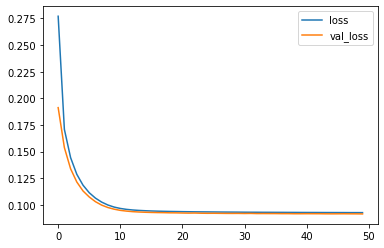

In [9]:
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [10]:
encoded_img = encoder.predict(x_test[:10].reshape(-1, 784))
decoded_img = decoder.predict(encoded_img)

<Figure size 432x288 with 0 Axes>

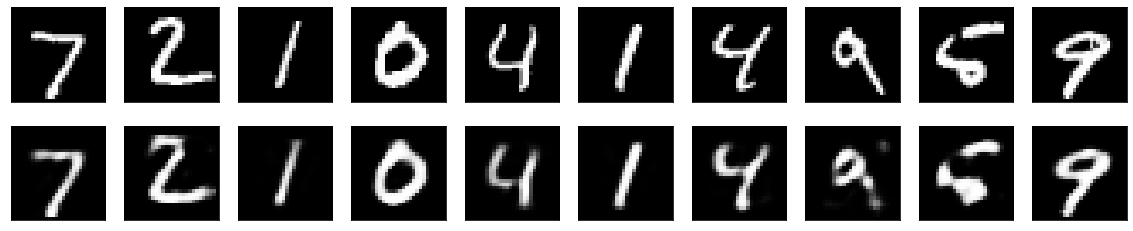

In [11]:
# 테스트 데이터로 결과 확인
n = 10
plt.gray()
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()  # 크기를 32로 줄였다가 다시 늘렸기 때문에 화질이 약간 안좋아짐

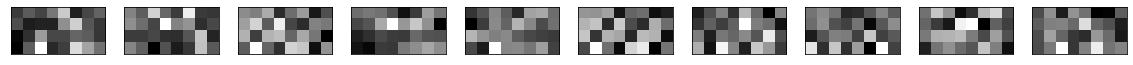

In [12]:
# 인코딩된 후 이미지
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(encoded_img[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## 모델 변경해 해상도 향상

In [13]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [14]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               1011

In [15]:
# 만들어진 모델을 사용해 encoder만 따로 생성
encoder = Model(input_img, encoded)
encoder.summary()  # 출력 32

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 모델 학습
autoencoder.fit(flatted_x_train, flatted_x_train,
                epochs=100, batch_size=256,
                validation_data=(flatted_x_test, flatted_x_test)
                )

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2557 - val_loss: 0.1758
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1541 - val_loss: 0.1366
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1326 - val_loss: 0.1267
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1252 - val_loss: 0.1206
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1194 - val_loss: 0.1155
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1144 - val_loss: 0.1109
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1101 - val_loss: 0.1078
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1069 - val_loss: 0.1041
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1045 - val_loss: 0.1026
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1028 - val_lo

In [17]:
# 결과 확인
decoded_img = autoencoder.predict(flatted_x_test)

<Figure size 432x288 with 0 Axes>

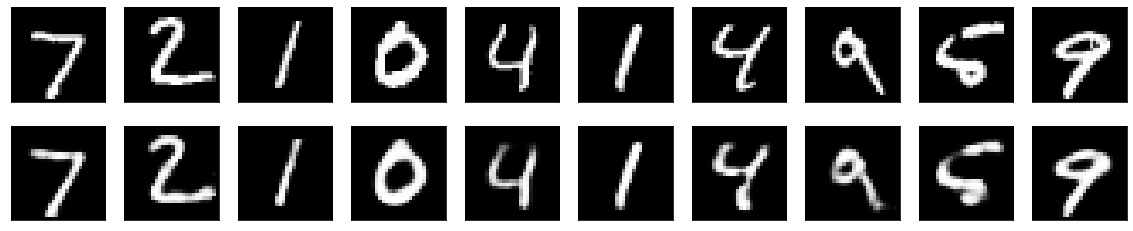

In [18]:
# 테스트 데이터로 결과 확인
n = 10
plt.gray()
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()  # 크기를 32로 줄였다가 다시 늘렸기 때문에 화질이 약간 안좋아짐

## CNN을 사용해 성능 향상

In [19]:
# 모델 생성
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPool2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)
encoded = MaxPool2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # MaxPool과 반대되는 개념(각 값별로 크기 늘려줌)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0   

In [20]:
# 데이터 reshape
conv_x_train = np.reshape(x_train, (-1, 28, 28, 1))
conv_x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [21]:
# 모델 학습
autoencoder.fit(conv_x_train, conv_x_train,
                epochs=50, batch_size=128,
                validation_data=(conv_x_test, conv_x_test),
                )

Epoch 1/50
469/469 [==============================] - 6s 6ms/step - loss: 0.1746 - val_loss: 0.0935
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0894 - val_loss: 0.0847
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0834 - val_loss: 0.0808
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0803 - val_loss: 0.0784
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0785 - val_loss: 0.0777
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0772 - val_loss: 0.0759
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0762 - val_loss: 0.0750
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0754 - val_loss: 0.0743
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0748 - val_loss: 0.0738
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0743 - val_loss: 0.0734

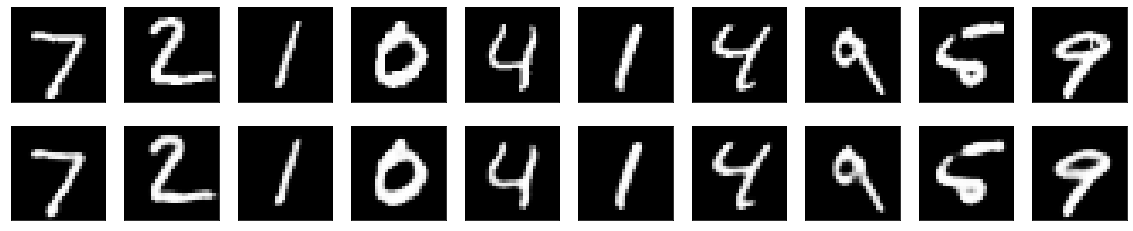

In [22]:
# 결과 확인
decoded_imgs = autoencoder.predict(conv_x_test)
n = 10
plt.figure(figsize=(20,4))
plt.gray()
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## 데이터에 잡음 추가

In [23]:
noise_factor = 0.5  # 잡음 크기 비율(반으로)
x_train_noisy = conv_x_train + noise_factor * np.random.normal(  # 정규분포를 따르는 noise 추가
    loc=0.0,  # 평균
    scale=1.0,  # 표준편차
    size=conv_x_train.shape
)
x_test_noisy = conv_x_test + noise_factor * np.random.normal(  # 정규분포를 따르는 noise 추가
    loc=0.0,  # 평균
    scale=1.0,  # 표준편차
    size=conv_x_test.shape
)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

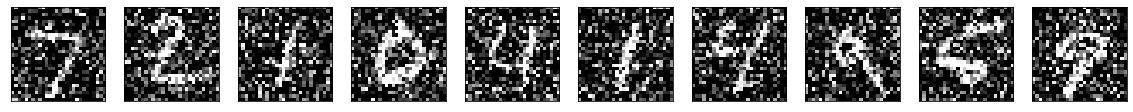

In [24]:
n = 10
plt.figure(figsize=(20, 2))
plt.gray()
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
# 모델 생성
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPool2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)
encoded = MaxPool2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # MaxPool과 반대되는 개념(각 값별로 크기 늘려줌)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 8)         0   

In [26]:
# 모델 학습
fit_hist = autoencoder.fit(x_train_noisy, conv_x_train,
                           epochs=100, batch_size=128,
                           validation_data=(x_test_noisy, conv_x_test)
                           )

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2172 - val_loss: 0.1345
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1293 - val_loss: 0.1238
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1230 - val_loss: 0.1200
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1199 - val_loss: 0.1176
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1176 - val_loss: 0.1153
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1160 - val_loss: 0.1139
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1147 - val_loss: 0.1132
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1138 - val_loss: 0.1121
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1132 - val_loss: 0.1115
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1125 - val_lo

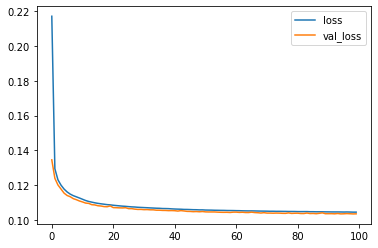

In [28]:
# 결과 확인
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

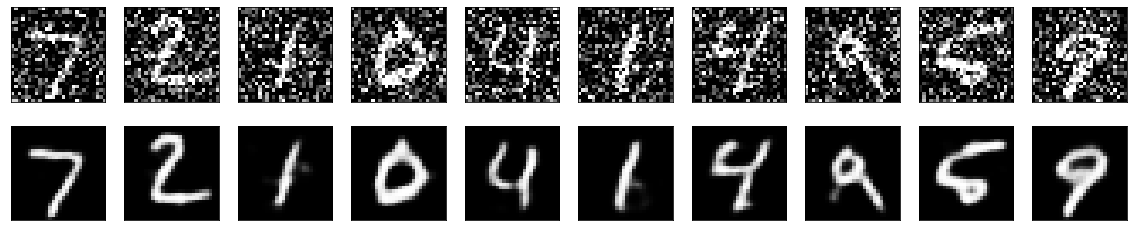

In [27]:
# 결과 확인
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20,4))
plt.gray()
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()